In [ ]:
# ML Zoomcamp Module 2 Homework - Tristan Kilper

In [ ]:
# Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")

In [3]:
df = df[["engine_displacement","horsepower","vehicle_weight","model_year","fuel_efficiency_mpg"]]

In [4]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [5]:
# EDA

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

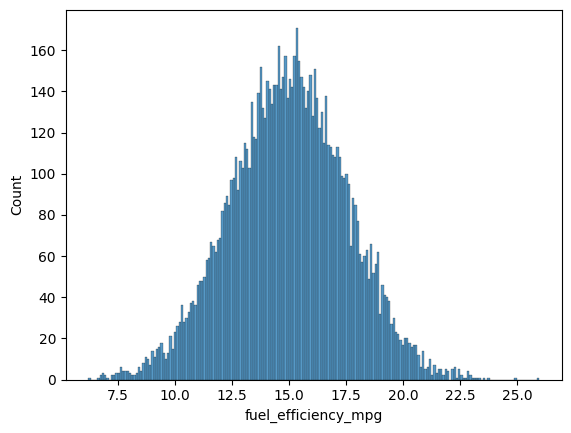

In [6]:
sns.histplot(df.fuel_efficiency_mpg, bins=200)

In [7]:
# Q1

In [8]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [9]:
# Q2

In [10]:
df[["horsepower"]].median()

horsepower    149.0
dtype: float64

In [11]:
# Prepare and Split the Dataset

In [12]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [13]:
idx = np.arange(n)
idx

array([   0,    1,    2, ..., 9701, 9702, 9703], shape=(9704,))

In [14]:
np.random.seed(42)
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [15]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

y_train = np.array(df_train.fuel_efficiency_mpg.values)
y_val = np.array(df_val.fuel_efficiency_mpg.values)
y_test = np.array(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006


In [24]:
# Q3

In [22]:
hp_mean = df_train['horsepower'].mean()
hp_mean

np.float64(149.54476367006487)

In [23]:
df_train_0s = df_train.fillna(0)
df_val_0s = df_val.fillna(0)
df_test_0s = df_test.fillna(0)

df_train_avgs = df_train.fillna(hp_mean)
df_val_avgs = df_val.fillna(hp_mean)
df_test_avgs = df_test.fillna(hp_mean)

In [24]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [28]:
w0_0s, w_0s = train_linear_regression(df_train_0s, y_train)

In [29]:
w0_avgs, w_avgs = train_linear_regression(df_train_avgs, y_train)

In [27]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [33]:
y_pred_0s = w0_0s + df_val_0s.dot(w_0s)
y_pred_avgs = w0_avgs + df_val_avgs.dot(w_avgs)

round(rmse(y_val, y_pred_0s), 2)

np.float64(0.52)

In [42]:
round(rmse(y_val, y_pred_avgs), 2)

np.float64(0.46)

In [35]:
# Q4

In [36]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [44]:
rs = [0, 0.01, 0.1, 1, 5, 10, 100]
rmses = []
for r in rs:
    w0, w = train_linear_regression_reg(df_train_0s, y_train, r)
    y_pred = w0 + df_val_0s.dot(w)
    rmses.append(round(rmse(y_val, y_pred), 2))
rmses

[np.float64(0.52),
 np.float64(0.52),
 np.float64(0.52),
 np.float64(0.52),
 np.float64(0.52),
 np.float64(0.52),
 np.float64(0.52)]

In [45]:
# Q5

In [83]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmses2 = []
for s in seeds:
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]

    y_train = np.array(df_train.fuel_efficiency_mpg.values)
    y_val = np.array(df_val.fuel_efficiency_mpg.values)

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)

    df_train = df_train.fillna(0).values
    df_val = df_val.fillna(0).values
    
    w0, w = train_linear_regression(df_train, y_train)
    y_pred = w0 + df_val.dot(w)
    rmses2.append(rmse(y_val, y_pred))
rmses2

[np.float64(0.5206531296294218),
 np.float64(0.521338891285577),
 np.float64(0.5228069974803171),
 np.float64(0.515951674119676),
 np.float64(0.5109129460053851),
 np.float64(0.52834064601107),
 np.float64(0.5313910658146311),
 np.float64(0.5090670387381733),
 np.float64(0.5147399129511132),
 np.float64(0.5131865908224594)]

In [88]:
sd = np.std(rmses2)
sd

np.float64(0.006989446426433706)

In [89]:
round(sd, 3)

np.float64(0.007)

In [90]:
# Q6

In [91]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train_val = df.iloc[idx[:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

y_train_val = np.array(df_train_val.fuel_efficiency_mpg.values)
y_test = np.array(df_test.fuel_efficiency_mpg.values)

del df_train_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train_val = df_train_val.fillna(0).values
df_test = df_test.fillna(0).values

w0, w = train_linear_regression(df_train_val, y_train_val)
y_pred = w0 + df_test.dot(w)
rmse(y_test, y_pred)

np.float64(0.5156132022024005)